---
# Actividad Estadística Básica
---
- **Nombre: Daniel Gutiérrez Gómez**
- **Matrícula: A01068056**
- 03/22/23

In [11]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


El conjunto de datos es una tabla que contiene el top 50 de los libros más vendidos por Amazon por año desde 2009 hasta 2019. Cada libro está clasificado como Ficción o No ficción.


**Crea una tabla resumen con los estadísticas generales de las variables**

In [5]:
amazon_books = pd.read_csv('./datasets/bestsellers with categories.csv')
display(amazon_books.iloc[:6])

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction


**¿Cuál es el género con más publicaciones? Muéstralo en un gráfico.**


In [44]:
display(amazon_books.groupby([amazon_books["Genre"]]).agg(genres=("Genre","count")))

,genres
Genre,
Fiction,240
Non Fiction,310


Vemos que el género con más publicaciones del DataSet es el de no ficción, a continuación la gráfica

Text(0, 0.5, 'Number of books')

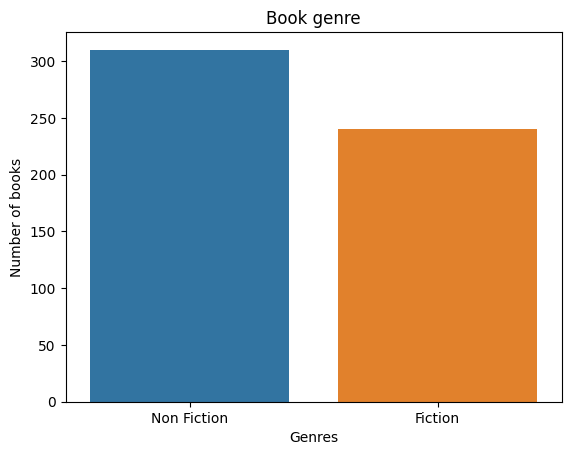

In [45]:
sns.countplot(data=amazon_books, x='Genre')
plt.title('Book genre')
plt.xlabel('Genres')
plt.ylabel('Number of books')

**¿Cuántos libros del top 50 se publicaron por género en cada año? ¿Hay algún año donde hubo más libros de ficción en el top 50?. Muéstralo en un gráfico.**

Text(0.5, 1.0, 'Genre Count by Year')

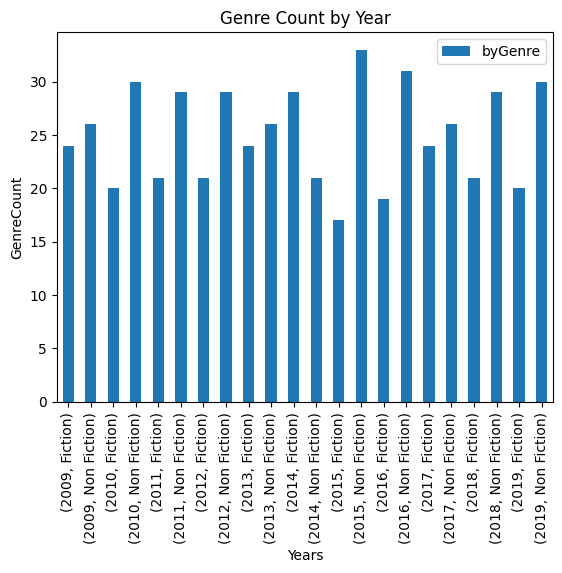

In [77]:
c = ['red', 'yellow', 'black', 'blue', 'orange']
amazon_books.groupby(["Year", "Genre"]).agg(byGenre=("Genre", "count")).plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('GenreCount')
plt.title('Genre Count by Year')


**¿Cómo se distribuye la variable Review? Muéstra el histografa.**

<Axes: xlabel='Reviews', ylabel='Count'>

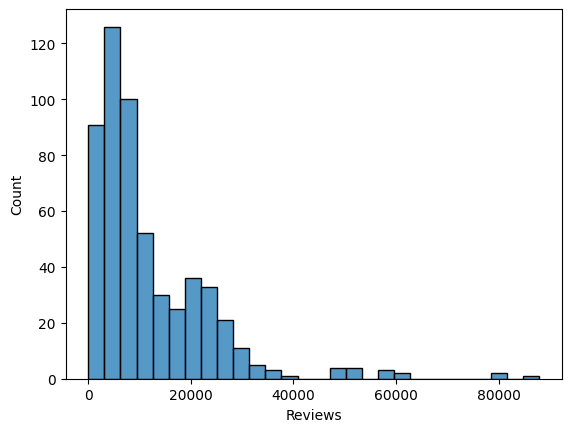

In [78]:
sns.histplot(data=amazon_books, x='Reviews')

**Ahora muéstralo en un gráfico de caja y bigote.**

Text(0.5, 1.0, 'Histograma del ancho de sépalo por especie')

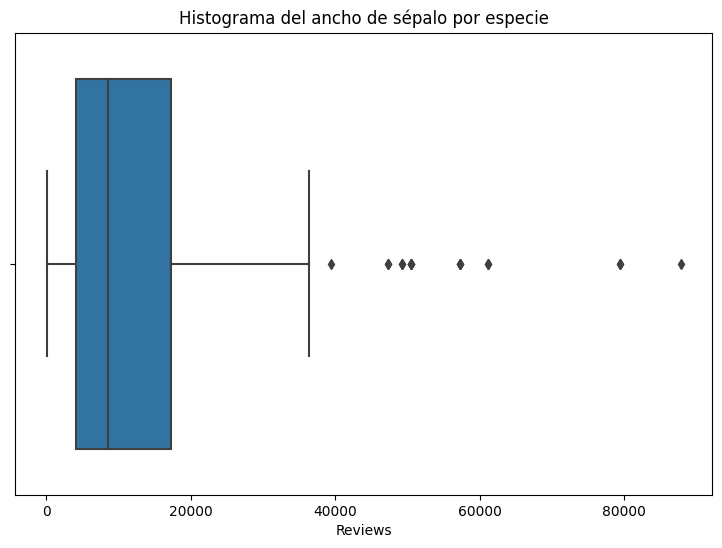

In [81]:
# Tamaño de la imagen
fig = plt.figure(figsize=(9, 6))

# Gráfico boxplot
sns.boxplot(data=amazon_books, x='Reviews')

# Ejes y título
plt.title('Histograma del ancho de sépalo por especie')



**¿Cómo se compara la evaluación del libro por género? ¿Qué genero es mejor evaluado por los lectores? Muéstralo en un solo gráfico de caja y bigote.**

Text(0.5, 1.0, 'Histograma de las evaluaciones por género')

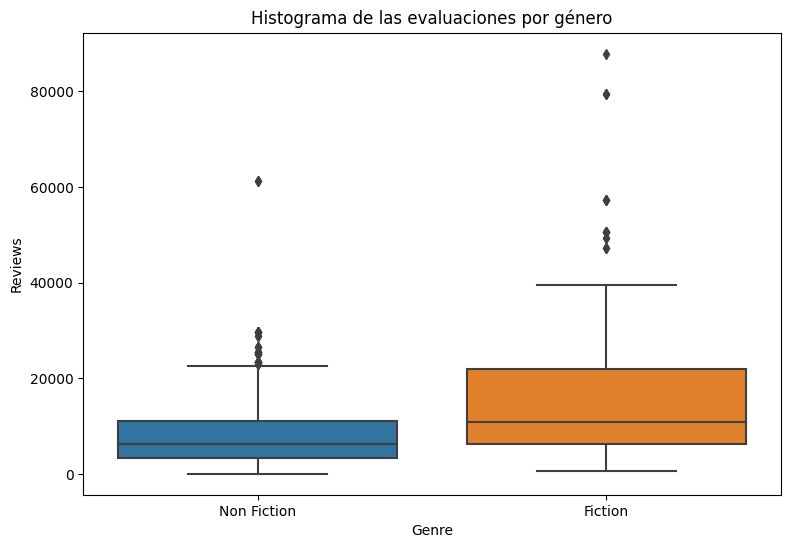

In [87]:
# Tamaño de la imagen
fig = plt.figure(figsize=(9, 6))

# Gráfico boxplot
sns.boxplot(data=amazon_books, y='Reviews', x='Genre')

# Ejes y título
plt.title('Histograma de las evaluaciones por género')

**Como vemos en el histograma de bigote y caja, el género con más evaluaciones es el de ficción, por otro lado, el que mejores evaluaciones tiene, puede que sea el de Non Fiction, puesot que tiene menos datos que están fuera de los rangos normales (outliers), por lo que pueden afectar a la información verídica**

**¿Cuál es la relación entre el número de reseñas y precios? Muéstralo en un gráfico de dispersión.**

Text(0, 0.5, 'Reseñas')

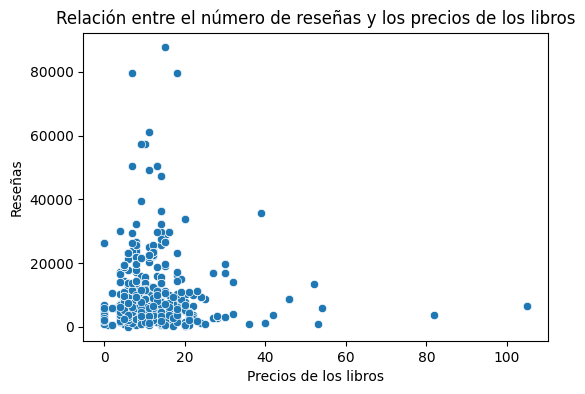

In [94]:

# Graficaremos la relación entre el número de reseñas y los precios de los libros.

# Tamaño de la imagen.
fig = plt.figure(figsize=(6, 4))

# Gráfico scatterplot.
sns.scatterplot(data=amazon_books, x ='Price', y='Reviews')

# Ejes y título. Colocamos la etiqueta correcta de acuerdo a la orientación.
plt.title('Relación entre el número de reseñas y los precios de los libros')
plt.xlabel('Precios de los libros')
plt.ylabel('Reseñas')

**De la pregunta anterior, ¿influye algo el año de publicación? ¿Cuál es la relación entre el número de reseñar, el precio y el año de publicación? IMPORTANTE: Selecciona una paleta de colores adeacuada.**

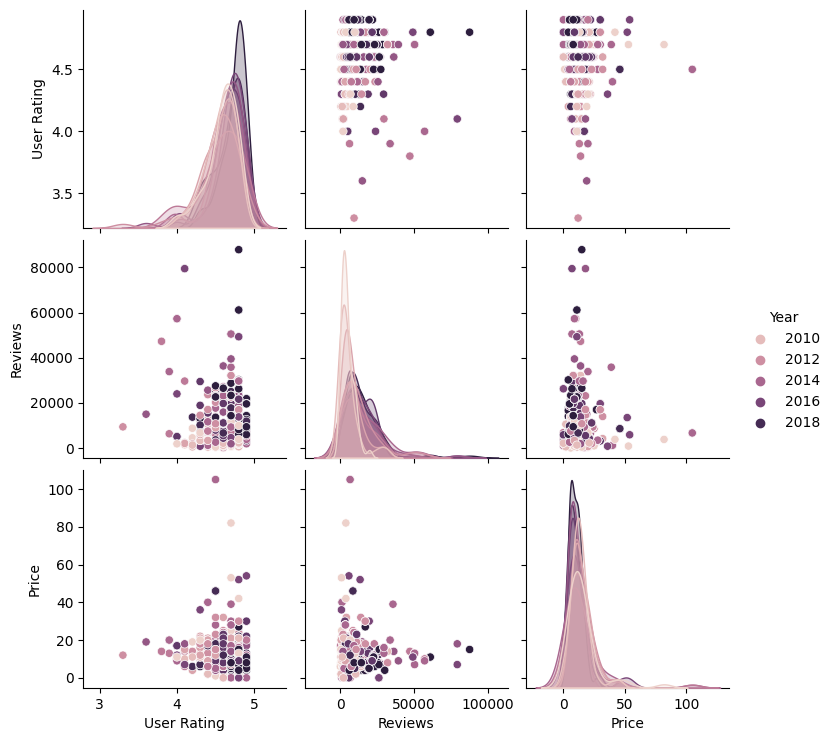

In [96]:
sns.pairplot(data=amazon_books, hue="Year")

**¿Cuál es la correlación entre las variables numéricas? Muéstralo en un gráfico. La variable año, a pesar de ser numérica, la vamos a considerar como cualitativa, así que la eliminaremos del análisis.**

<Axes: >

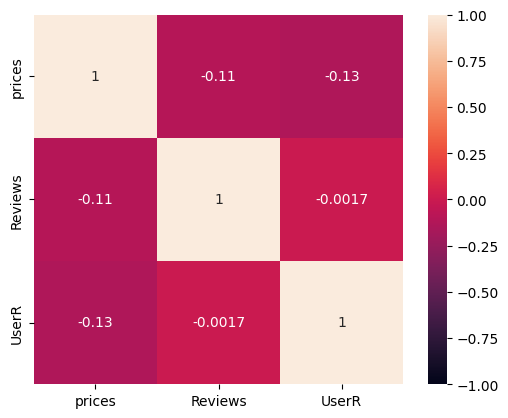

In [114]:
correlation = pd.DataFrame().assign(prices=amazon_books["Price"], Reviews=amazon_books["Reviews"],  UserR=amazon_books["User Rating"]).corr()
sns.heatmap(data=correlation, vmin=-1, vmax=1,  annot=True, square = True)


**¿Cuáles variables tiene una fuerte relación positiva entre sí y cuáles tienen una fuerte relación negativa? (Esta pregunta no es de código) Responde la pregunta en la siguiente celda de texto.**
Como vemos en el heatMap, la mayoría tiene un valor de correlación casi de 0, por lo que decimos que casi no hay correlación, por lo que no hay casi relación entre datos.

**Haz una gráfica donde podemos comparar la relación entre las tres variables numéricas (User Rating, Reviews y Price) y que, además, podamos ver el efecto del libro. La variable año, a pesar de ser numérica, la vamos a considerar como cualitativa, así que la eliminaremos del análisis.**

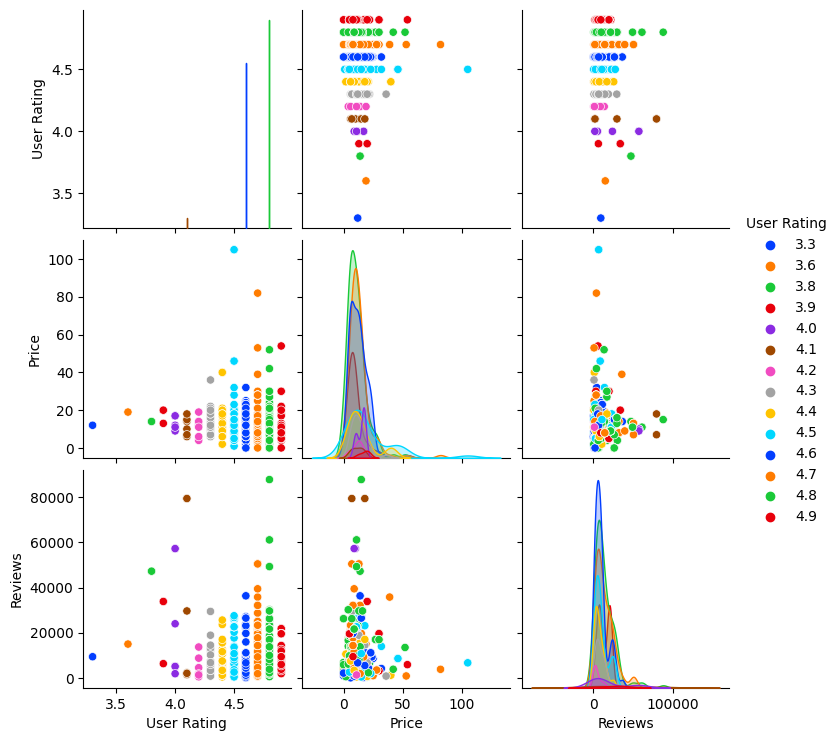

In [105]:
sns.pairplot(data=amazon_books, 
             x_vars= ["User Rating", "Price", "Reviews"],
             y_vars=["User Rating", "Price", "Reviews"], hue="User Rating", palette="bright")